# NO3 Plate Processing

### upload

In [281]:
#install.packages('tibble')

In [282]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [283]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients"

In [284]:
# load plate raws 
raw <- read.table("plate_results/Nitrate_Test_4_11_25_BKS_edited.txt",header=TRUE)

In [285]:
raw

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0706,0.0736,0.0771,0.0800,0.0912,0.1030,0.1113,0.1249,0.8543,0.4853,0.1132,0.0712
0.0679,0.0891,0.1218,0.1743,0.2821,0.5668,0.9947,0.0676,0.8750,0.4912,0.1115,0.0714
0.0767,0.0752,0.0773,0.0762,0.0751,0.1259,0.8734,0.1136,0.0719,0.0709,0.0697,0.0693
0.0860,0.0789,0.0836,0.0845,0.0964,0.0801,0.5002,0.0774,0.0753,0.0770,0.0769,0.0735
0.0676,0.0737,0.0771,0.0796,0.0896,0.0986,0.1112,0.1221,0.8594,0.4971,0.0975,0.0751
0.0672,0.0897,0.1222,0.1760,0.2838,0.5686,1.0071,0.0664,0.8670,0.4949,0.1126,0.0716
0.0700,0.0743,0.0777,0.0804,0.0902,0.1011,0.1099,0.1243,0.2929,0.2904,0.2912,0.2912
0.0704,0.0728,0.0751,0.0779,0.0875,0.0975,0.1095,0.1170,0.4866,0.4859,0.4870,0.4885


In [286]:
options(scipen = 999)
options(digits = 5)  

In [287]:
letters[1:5]

[1] "a" "b" "c" "d" "e"

In [288]:
## data cleanup 
# fix colnames 
colnames(raw) <- seq(1:12)
rownames(raw) <- letters[1:8]

In [289]:
# convert to numeric 
# raw <- as.numeric(raw)

## Standard Test - processing 
this standards test plate was run on 4/11
- 4x **extra low (0 - 0.05 ppm)**
- and 2x **standards (0 - 1 ppm)**
- 2x test samples
- 2x spiked samples and 1 spiked blank (DI)
    - row G 50 uL 0.5ppm from QC2, 50 uL sample
    - row H 50 uL 1ppm from QC1, 50 uL sample 
- 1x filter blank
    - C & D 9:11
- 3x 4 QC checks using ERA standard 

In [290]:
# upload plate set up 
plate_setup <- read_excel('std_test_mapv2.xlsx',skip=1) %>% select(-1) %>% select(-13)%>% slice(1:8)

New names:
• `` -> `...1`
• `` -> `...14`


In [291]:
## data cleanup 
plate_setup<-as.data.frame(plate_setup)
rownames(plate_setup) <- letters[1:8]

In [292]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,QC1,QC2,QC3,QC4
b,Std 1,Std 2,Std 3,Std 4,Std 5,Std 6,Std 7,DI,QC1,QC2,QC3,QC4
c,123,123,123,159,159,159,QC1,QC3,blank,blank,blank,DI
d,123,123,123,159,159,159,QC2,QC4,blank,blank,blank,DI
e,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,QC1,QC2,QC3,QC4
f,Std 1,Std 2,Std 3,Std 4,Std 5,Std 6,Std 7,DI,QC1,QC2,QC3,QC4
g,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,123spk,123spk,123spk,DIspk
h,LOW 1,LOW 1.5,LOW 2,LOW 3,LOW 4,LOW 5,LOW 6,LOW 7,159spk,159spk,159spk,DIspk


### Low 

#### add data 

In [293]:
low <- data.frame(id = unlist(plate_setup[1, 1:8]),
                    conc = c(0,0.002,0.005,0.01,0.02,0.03,0.04,0.05),
                    od = unlist(raw[1, 1:8]),
                    od2 = unlist(raw['e', 1:8]),
                    od3 = unlist(raw['g',1:8]),
                    od4 = unlist(raw['h',1:8])
                 )
low

,id,conc,od,od2,od3,od4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOW 1,0.000,0.0706,0.0676,0.0700,0.0704
2,LOW 1.5,0.002,0.0736,0.0737,0.0743,0.0728
3,LOW 2,0.005,0.0771,0.0771,0.0777,0.0751
4,LOW 3,0.010,0.0800,0.0796,0.0804,0.0779
5,LOW 4,0.020,0.0912,0.0896,0.0902,0.0875
6,LOW 5,0.030,0.1030,0.0986,0.1011,0.0975
7,LOW 6,0.040,0.1113,0.1112,0.1099,0.1095
8,LOW 7,0.050,0.1249,0.1221,0.1243,0.1170


In [294]:
# check character types (all need to be numeric to run model)
str(low)

'data.frame':	8 obs. of  6 variables:
 $ id  : chr  "LOW 1" "LOW 1.5" "LOW 2" "LOW 3" ...
 $ conc: num  0 0.002 0.005 0.01 0.02 0.03 0.04 0.05
 $ od  : num  0.0706 0.0736 0.0771 0.08 0.0912 ...
 $ od2 : num  0.0676 0.0737 0.0771 0.0796 0.0896 ...
 $ od3 : num  0.07 0.0743 0.0777 0.0804 0.0902 ...
 $ od4 : num  0.0704 0.0728 0.0751 0.0779 0.0875 ...


In [295]:
# convert concentration to numeric 
# low$conc <- as.numeric(as.character(low$conc))

In [296]:
# calculate avg, standard deviation  and pivot 
low$avg_od <- rowMeans(low[, c("od", "od2", "od3","od4")])

# pivot
low_long<-low %>% pivot_longer(cols = c("od", "od2", "od3","od4"),
             names_to = 'rep',
             values_to = 'od')
# std dev
low_long <- low_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [297]:
low_long %>%
  distinct(id, .keep_all = TRUE)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
LOW 1,0.000,0.069650,od,0.0706,0.00138924
LOW 1.5,0.002,0.073600,od,0.0736,0.00061644
LOW 2,0.005,0.076750,od,0.0771,0.00113578
LOW 3,0.010,0.079475,od,0.0800,0.00109962
LOW 4,0.020,0.089625,od,0.0912,0.00156285
LOW 5,0.030,0.100050,od,0.1030,0.00247723
LOW 6,0.040,0.110475,od,0.1113,0.00091059
LOW 7,0.050,0.122075,od,0.1249,0.00359108


In [298]:
# add high curve?

In [299]:
# b & f 1:7
hi <- data.frame(id = unlist(plate_setup['b', 1:7]),
                    conc = c('0','0.02','0.05','0.1','0.2','0.5','1'),
                    od = unlist(raw['b', 1:7]),
                    od2 = unlist(raw['f', 1:7])
                 )
hi

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,Std 1,0,0.0679,0.0672
2,Std 2,0.02,0.0891,0.0897
3,Std 3,0.05,0.1218,0.1222
4,Std 4,0.1,0.1743,0.1760
5,Std 5,0.2,0.2821,0.2838
6,Std 6,0.5,0.5668,0.5686
7,Std 7,1,0.9947,1.0071


#### Standard curve

In [300]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
low_model <- lm(conc ~ od, data = low_long)
# view summary stats (R-squared)
summary(low_model)


Call:
lm(formula = conc ~ od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00350 -0.00143 -0.00017  0.00102  0.00421 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.06847    0.00173   -39.6 <0.0000000000000002 ***
od           0.97657    0.01879    52.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00189 on 30 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.989 
F-statistic: 2.7e+03 on 1 and 30 DF,  p-value: <0.0000000000000002


In [301]:
## use the averages for the curve 
low_avg_model <- lm(conc ~ avg_od, data = low_long)
summary(low_avg_model)


Call:
lm(formula = conc ~ avg_od, data = low_long)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.001372 -0.001062  0.000523  0.000754  0.000953 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.069185   0.000905   -76.4 <0.0000000000000002 ***
avg_od       0.984455   0.009847   100.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.000988 on 30 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.997 
F-statistic: 1e+04 on 1 and 30 DF,  p-value: <0.0000000000000002


In [302]:
aic <- AIC(low_model, low_avg_model)
aic
# non-avg is better, but avg has higher R2

,df,AIC
,<dbl>,<dbl>
low_model,3,-306.51
low_avg_model,3,-348.10


`geom_smooth()` using formula = 'y ~ x'


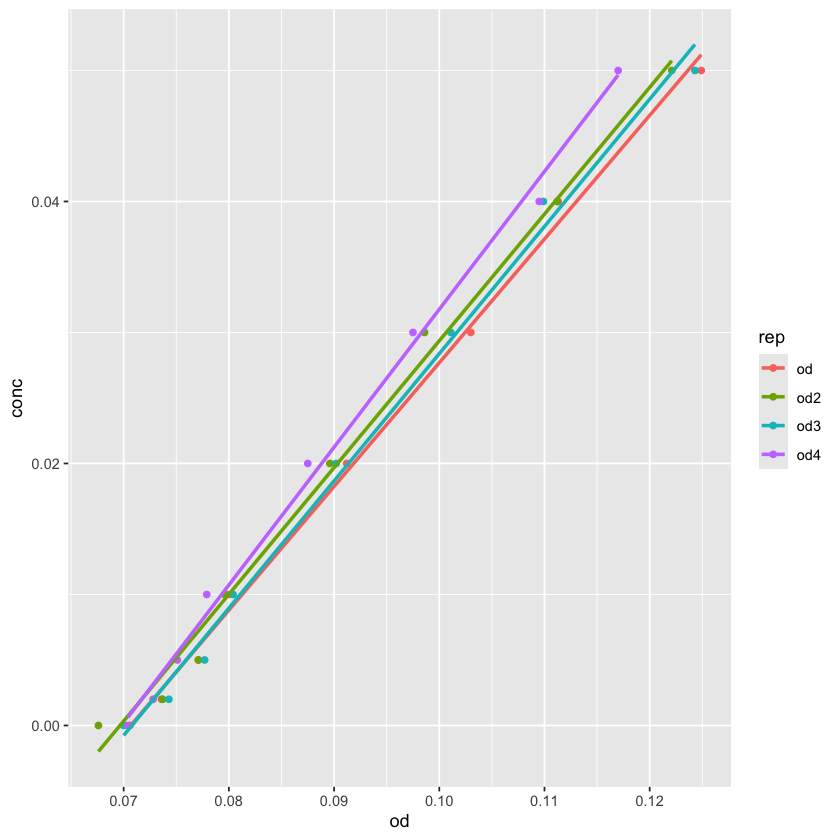

In [303]:
# Plot the data with the regression line
ggplot(low_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


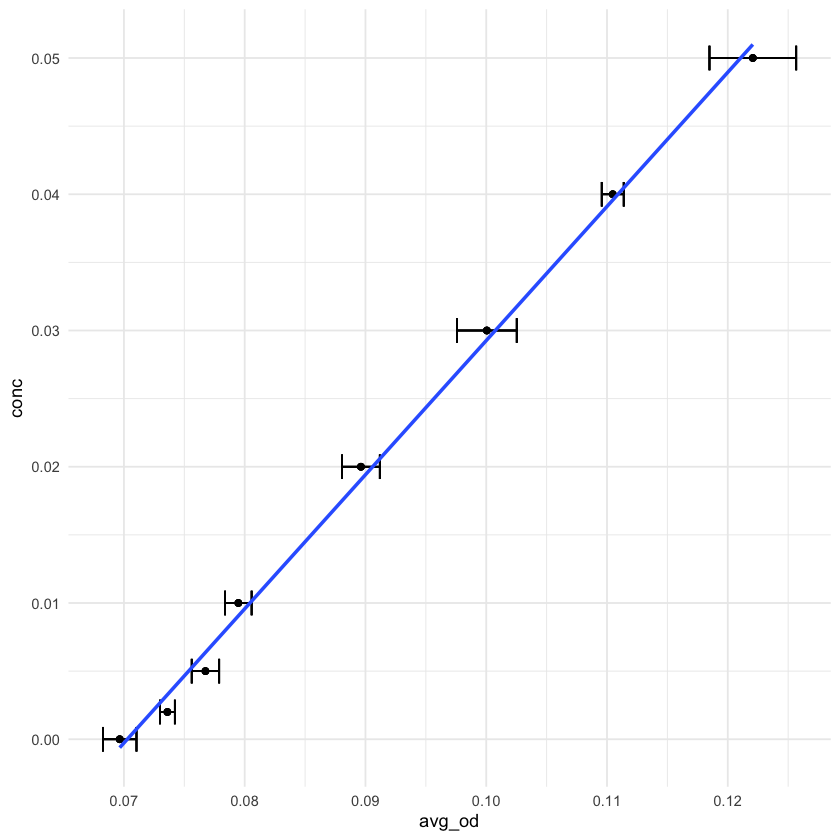

In [304]:
ggplot(low_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### High

In [305]:
hi

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,Std 1,0,0.0679,0.0672
2,Std 2,0.02,0.0891,0.0897
3,Std 3,0.05,0.1218,0.1222
4,Std 4,0.1,0.1743,0.1760
5,Std 5,0.2,0.2821,0.2838
6,Std 6,0.5,0.5668,0.5686
7,Std 7,1,0.9947,1.0071


In [306]:
# convert to numeric
hi$conc<-as.numeric(hi$conc)

# calculate avg, standard deviation  and pivot 
hi$avg_od <- rowMeans(hi[, c("od", "od2")])

# pivot
hi_long<-hi %>% pivot_longer(cols = c("od", "od2"),
             names_to = 'rep',
             values_to = 'od')
# std dev
hi_long <- hi_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [307]:
head(hi_long)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Std 1,0.00,0.06755,od,0.0679,0.00049497
Std 1,0.00,0.06755,od2,0.0672,0.00049497
Std 2,0.02,0.08940,od,0.0891,0.00042426
Std 2,0.02,0.08940,od2,0.0897,0.00042426
Std 3,0.05,0.12200,od,0.1218,0.00028284
Std 3,0.05,0.12200,od2,0.1222,0.00028284


#### Standard curve

In [308]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
hi_model <- lm(conc ~ od, data = hi_long)
# view summary stats (R-squared)
summary(hi_model)


Call:
lm(formula = conc ~ od, data = hi_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02268 -0.01331  0.00438  0.00937  0.02216 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -0.08470    0.00575   -14.7         0.0000000048 ***
od           1.06820    0.01258    84.9 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0149 on 12 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 7.21e+03 on 1 and 12 DF,  p-value: <0.0000000000000002


In [309]:
## use the averages for the curve 
hi_avg_model <- lm(conc ~ avg_od, data = hi_long)
summary(hi_avg_model)


Call:
lm(formula = conc ~ avg_od, data = hi_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02173 -0.01375  0.00439  0.01172  0.01550 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -0.08472    0.00565   -15.0         0.0000000039 ***
avg_od       1.06826    0.01236    86.5 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0147 on 12 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.998 
F-statistic: 7.47e+03 on 1 and 12 DF,  p-value: <0.0000000000000002


In [310]:
aic <- AIC(hi_model, hi_avg_model)
aic
# soo close for aic and r squared, so just use avg 

,df,AIC
,<dbl>,<dbl>
hi_model,3,-74.180
hi_avg_model,3,-74.679


`geom_smooth()` using formula = 'y ~ x'


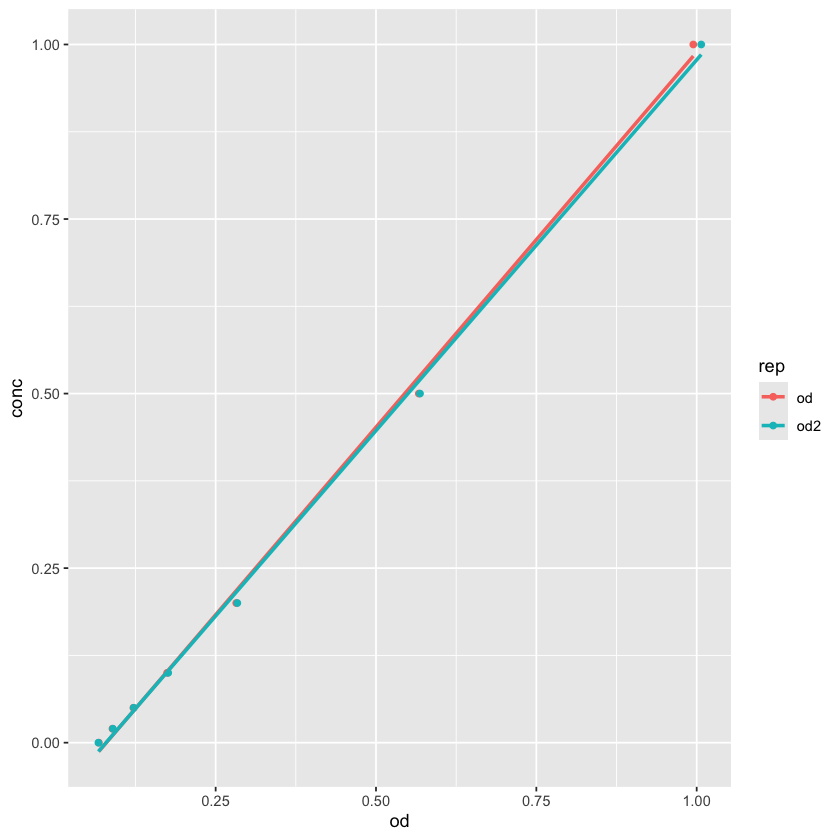

In [311]:
# Plot the data with the regression line
ggplot(hi_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


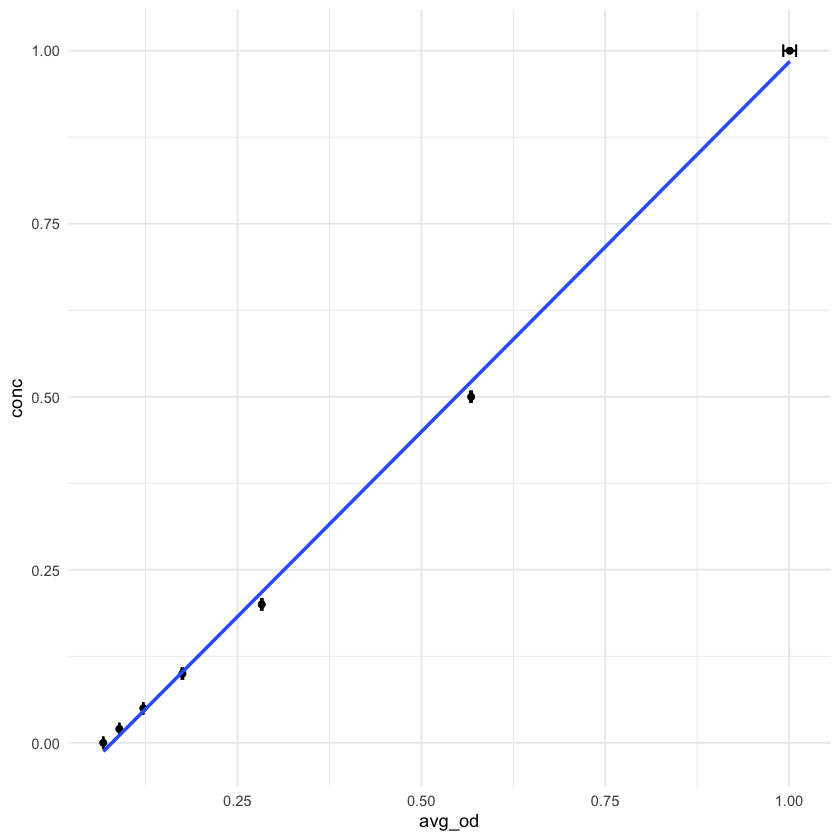

In [312]:
ggplot(hi_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

### Combined 

In [313]:
# merge rows 
stnds<-bind_rows(hi_long, low_long)

head(stnds)

id,conc,avg_od,rep,od,sd
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Std 1,0.00,0.06755,od,0.0679,0.00049497
Std 1,0.00,0.06755,od2,0.0672,0.00049497
Std 2,0.02,0.08940,od,0.0891,0.00042426
Std 2,0.02,0.08940,od2,0.0897,0.00042426
Std 3,0.05,0.12200,od,0.1218,0.00028284
Std 3,0.05,0.12200,od2,0.1222,0.00028284


In [314]:
# recalculate averages 
stnds<-stnds %>% 
    group_by(conc) %>% 
        mutate(avg_od = mean(od))

In [315]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switcstndsng variables. since they are a linear relationsstndsp tstndss should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
stnds_model <- lm(conc ~ od, data = stnds)
# view summary stats (R-squared)
summary(stnds_model)


Call:
lm(formula = conc ~ od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02421 -0.00107  0.00166  0.00324  0.02483 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.07755    0.00162   -47.8 <0.0000000000000002 ***
od           1.05833    0.00615   172.0 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00864 on 44 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.998 
F-statistic: 2.96e+04 on 1 and 44 DF,  p-value: <0.0000000000000002


In [316]:
## use the averages for the curve 
stnds_avg_model <- lm(conc ~ avg_od, data = stnds)
summary(stnds_avg_model)


Call:
lm(formula = conc ~ avg_od, data = stnds)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02330 -0.00105  0.00167  0.00328  0.01819 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -0.07757    0.00157   -49.3 <0.0000000000000002 ***
avg_od       1.05842    0.00597   177.2 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00839 on 44 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 3.14e+04 on 1 and 44 DF,  p-value: <0.0000000000000002


`geom_smooth()` using formula = 'y ~ x'


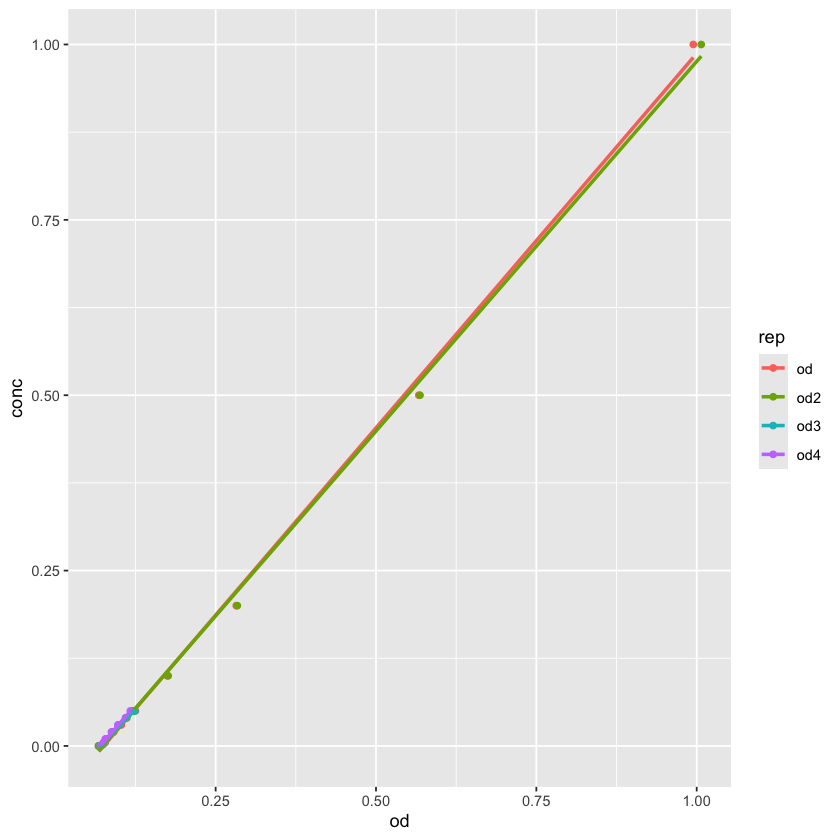

In [317]:
# Plot the data with the regression line
ggplot(stnds, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


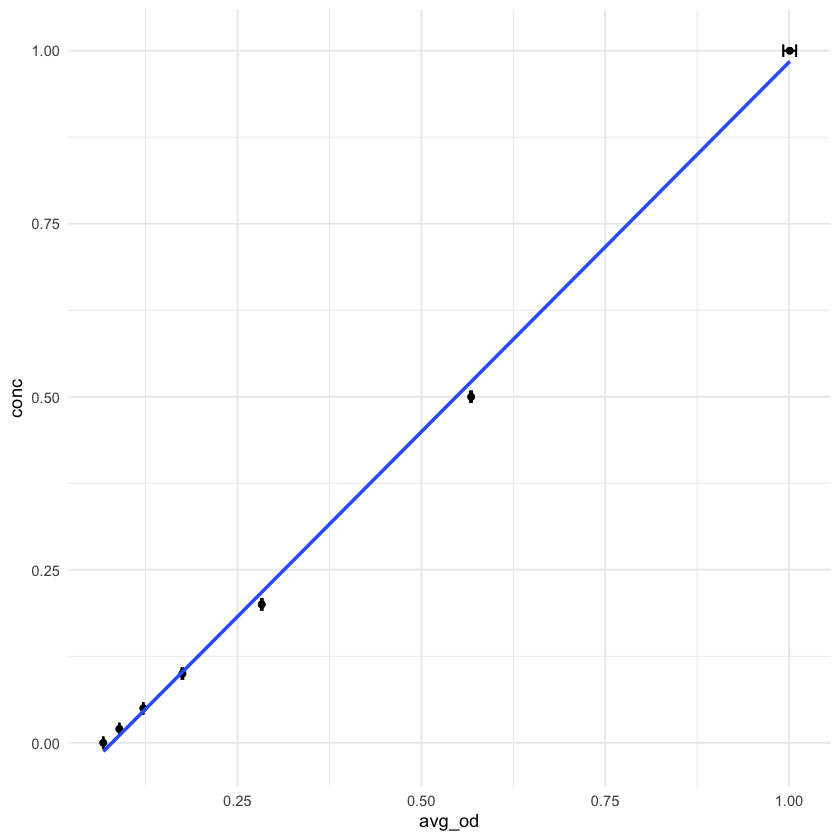

In [318]:
ggplot(hi_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

In [319]:
aic <- AIC(stnds_model, stnds_avg_model, hi_model, hi_avg_model, low_model, low_avg_model)
aic
# yay combined is better than low model alone
# using avg since thats what typically is used and the adjusted r squared is 0.999

Warning message in AIC.default(stnds_model, stnds_avg_model, hi_model, hi_avg_model, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
stnds_model,3,-302.595
stnds_avg_model,3,-305.327
hi_model,3,-74.180
hi_avg_model,3,-74.679
low_model,3,-306.508
low_avg_model,3,-348.104


## Samples and QC from curves

### add data 

In [320]:
# pull out sample data (samples, QCs, blanks) and use stnd curve to calculate concentrations

In [321]:
# samples
#S123: C & D 1-3 
#S159: C & D 4-6

s123 <- raw[c("c", "d"),1:3] %>%
    mutate(sample = 's123')
s159 <- raw[c("c", "d"),4:6] %>% 
    mutate(sample = 's159') 
# rename cols to match 
names(s159) <- c(1,2,3,'sample')

#spiked samples
#S123: g 9:11
#S159: h 9:11
#blanks: g,h 12

s123spk <- raw["g",9:11] %>%
    mutate(sample = 's123spk')
names(s123spk) <- c(1,2,3,'sample')

s159spk <- raw["h",9:11] %>%
    mutate(sample = 's159spk')
names(s159spk) <- c(1,2,3,'sample')

dispk <- raw[c("g", "h"), 12, drop = FALSE] %>%
  mutate(sample = c("dispk_q2","dispk_q1")) 
names(dispk) <- c(1,'sample')
dispk

# combine and pivot
samples <- rbind(s123, s159) 
samples <- rbind(samples, s123spk)
samples <- rbind(samples, s159spk) %>%
    pivot_longer(cols = 1:3,
                names_to = 'rep',
                 values_to = 'od')
head(samples)

,1,sample
,<dbl>,<chr>
g,0.2912,dispk_q2
h,0.4885,dispk_q1


sample,rep,od
<chr>,<chr>,<dbl>
s123,1,0.0767
s123,2,0.0752
s123,3,0.0773
s123,1,0.0860
s123,2,0.0789
s123,3,0.0836


In [322]:
# QC1 (1ppm): A,B,E,F 9 & C7 
# QC2 (0.5 ppm): A,B,E,F 10 & D7 
# QC3 (0.05 ppm): A,B,E,F 11 & C8
# QC4 (0.005 ppm): A,B,E,F 12 & D8

qc1 <- data.frame(
  rep = c(1, 2, 3, 4, 5), # Replicate numbers
  od = c(raw["a", 9], raw["b", 9], raw["e", 9], raw["f", 9], raw["c", 7]), # Extract specific values
  sample = "qc1"
)

qc2 <- data.frame(
  rep = c(1, 2, 3, 4, 5),
  od = c(raw["a", 10], raw["b", 10], raw["e", 10], raw["f", 10], raw["d", 7]),
  sample = "qc2" 
)

qc3 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw["a", 11], raw["b", 11], raw["e", 11], raw["f", 11], raw["c", 8]), 
  sample = "qc3" 
)

qc4 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw["a", 12], raw["b", 12], raw["e", 12], raw["f", 12], raw["d", 8]), 
  sample = "qc4" 
)

# Combine
qc_long <- bind_rows(qc1, qc2, qc3, qc4)
head(qc_long)

,rep,od,sample
,<dbl>,<dbl>,<chr>
1,1,0.8543,qc1
2,2,0.8750,qc1
3,3,0.8594,qc1
4,4,0.8670,qc1
5,5,0.8734,qc1
6,1,0.4853,qc2


In [323]:
# di blanks 
# B,F 8
# C,D 12
di <- data.frame(
  rep = c(seq(1:4)), # Replicate numbers
  od = c(raw["b", 8], raw["f", 8], 
         raw["c", 12], raw["d", 12]),
  sample = "di_blank"
)

# filter blanks 
# c,d 9:11
blank <- data.frame(
  rep = c(seq(1:6)), # Replicate numbers
  od = c(raw["c", 9], raw["c", 10], raw["c", 11], 
         raw["d", 9], raw["d", 10], raw["d", 11]),
  sample = "filter_blank"
)

# combine 
blanks<-bind_rows(di,blank)
head(blanks)

,rep,od,sample
,<int>,<dbl>,<chr>
1,1,0.0676,di_blank
2,2,0.0664,di_blank
3,3,0.0693,di_blank
4,4,0.0735,di_blank
5,1,0.0719,filter_blank
6,2,0.0709,filter_blank


In [324]:
samples<-rbind(samples, qc_long)
samples<-rbind(samples, blanks)

In [325]:
samples <- samples %>%
    group_by(sample) %>%
    mutate(avg_od = mean(od)) %>% # Calculate mean within each group and add it as a new column
    mutate(sd_od = sd(od)) %>%
    ungroup() # Remove grouping for subsequent operations
samples

sample,rep,od,avg_od,sd_od
<chr>,<chr>,<dbl>,<dbl>,<dbl>
s123,1,0.0767,0.079617,0.00425461
s123,2,0.0752,0.079617,0.00425461
s123,3,0.0773,0.079617,0.00425461
s123,1,0.0860,0.079617,0.00425461
s123,2,0.0789,0.079617,0.00425461
s123,3,0.0836,0.079617,0.00425461
s159,1,0.0762,0.089700,0.01933877
s159,2,0.0751,0.089700,0.01933877
s159,3,0.1259,0.089700,0.01933877


### predicted values based on standard curve (avgs using both low and regular standards)

In [326]:
# add stnds 
stnds<-stnds %>%
    rename(sd_od=sd,
          sample=id)

In [328]:
# add actual concentrations
samples <- samples %>%
    mutate(actual_conc = (case_when(
        sample == 'qc1' ~ 1,
        sample == 'qc2' ~ 0.5,
        sample == 'qc3' ~ 0.05,
        sample == 'qc4' ~ 0.005,
        sample == 'blank' ~ 0,
        TRUE ~ NA))
        )

# calculate predictions from stnd curve 
samples$predicted_conc_avglm <- predict(low_avg_model, newdata = samples)

#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc_avglm = mean(predicted_conc_avglm)) %>%
        # mutate(sd_predicted_conc_avglm = sd(predicted_conc_avglm)) %>%
        # no std dev since its avgs 
            ungroup()

In [329]:
# add in concentration for spiked samples
# g 9:12 + (q2) 0.25ppm (s123, di g12)
# h 9:12 + (q1) 0.5ppm (s159, di h12)
s123_value <- samples %>%
  filter(sample == "s123") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
spk123_value<-s123_value+0.25
s123_value
spk123_value

di_q2_value <- samples %>%
  filter(sample == "dispk_q2") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
spkdi_q2_value<-di_q2_value+0.25

s159_value <- samples %>%
  filter(sample == "s159") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
spk159_value<-s159_value+0.5

di_q1_value <- samples %>%
  filter(sample == "dispk_q1") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
spkdi_q1_value<-di_q1_value+0.5


1 
0.0091939

1 
0.25919

In [330]:
# calculate % error for qcs (individually, by rep)
# make lists to loop through 
qc_list <- c('qc1','qc2','qc3','qc4','s123spk','s159spk','dispk_q1','dispk_q2')
expected_conc <- c(1,0.5,0.05,0.005,spk123_value,spk159_value,spkdi_q1_value,spkdi_q2_value)

# calculate % error for qcs (individually, by rep)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error_avglm = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error_avglm = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc_avglm - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error_avglm  # For non-matching rows, retain NA
    ))
}

### predicted values based on standard curve (using both low and regular standards - NOT AVGS)

In [332]:
# calculate concentrations using curve 
samples$predicted_conc <- predict(stnds_model, newdata = samples)

#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc = mean(predicted_conc)) %>%
        mutate(sd_predicted_conc = sd(predicted_conc)) %>%
            ungroup()

In [333]:
# calculate % error for qcs (individually, by rep)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error = NA_real_)

# Loop through each QC sample
for (q in c(1:length(qc_list))) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error  # For non-matching rows, retain NA
    ))
}

In [334]:
### Final predictions 

In [335]:
# renumber sample reps:
samples <- samples %>%
  group_by(sample) %>%
  mutate(
    rep = row_number()
  ) %>%
  ungroup()

In [336]:
predictions_summary<-samples %>%
    group_by(sample) %>%
    slice(1)  #take first row of each sample since predictions are based on avgs not individual reps 

In [337]:
predictions_summary
# avg_predicted_conc_avglm = full standard curve (based on averages)
# avg_predicted_conc = full standard curve (based on individuals)

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc_avglm,avg_predicted_conc_avglm,percent_error_avglm,predicted_conc,avg_predicted_conc,sd_predicted_conc,percent_error
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
di_blank,1,0.0676,0.069200,0.00310376,NA,-0.0010609,-0.0010609,NA,-0.0060105,-0.004317137,0.00328480,NA
filter_blank,1,0.0719,0.073617,0.00318523,NA,0.0032872,0.0032872,NA,-0.0014596,0.000357154,0.00337102,NA
qc1,1,0.8543,0.865820,0.00890292,1.000,0.7831756,0.7831756,21.682,0.8265778,0.838769742,0.00942223,17.342
qc2,1,0.4853,0.493740,0.00574569,0.500,0.4168796,0.4168796,16.624,0.4360540,0.444986299,0.00608084,12.789
qc3,1,0.1132,0.109680,0.00685471,0.050,0.0387899,0.0387899,22.420,0.0422494,0.038524063,0.00725454,15.501
qc4,1,0.0712,0.073340,0.00278173,0.005,0.0030148,0.0030148,39.704,-0.0022005,0.000064349,0.00294398,144.010
s123,1,0.0767,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.0036203,0.006707134,0.00450278,NA
s123spk,1,0.2929,0.291500,0.00127671,NA,0.2177835,0.2177835,15.977,0.2324313,0.230949632,0.00135119,10.325
s159,1,0.0762,0.089700,0.01933877,NA,0.0191205,0.0191205,NA,0.0030912,0.017378629,0.02046680,NA


In [ ]:
# errors to fix: need to add in di spk and stnds to predictions 

In [ ]:
# qc checks (percent error) look way better in individual-based curve 
    # except qc4..may have been a pipetting error since its SO low 


In [344]:
# check spk for avg curve
s123spk <- samples %>%
  filter(sample == "s123spk") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
# calculate the added concentration (difference b/w predicted values) 
concentration_added <- round(s123spk - s123_value,2)
print(paste("s123 spike - concentration added:", concentration_added))
# pretty close to 0.25 

s159spk <- samples %>%
  filter(sample == "s159spk") %>%
  slice(1) %>%
  pull(predicted_conc_avglm)
# calculate the added concentration (difference b/w predicted values) 
concentration_added <- round(s159spk - s159_value,digits=2)
print(paste("s159 spike - concentration added:", concentration_added))
# a lil further but still pretty close to 0.5


[1] "s123 spike - concentration added: 0.21"
[1] "s159 spike - concentration added: 0.39"


In [345]:
# repeat: check spk for individual-based curve
s123_value <- samples %>%
  filter(sample == "s123") %>%
  slice(1) %>%
  pull(predicted_conc)

s123spk <- samples %>%
  filter(sample == "s123spk") %>%
  slice(1) %>%
  pull(predicted_conc)
# calculate the added concentration (difference b/w predicted values) 
concentration_added <- round(s123spk - s123_value,2)
print(paste("s123 spike - concentration added:", concentration_added))
# very close to 0.25 

s159_value <- samples %>%
  filter(sample == "s159") %>%
  slice(1) %>%
  pull(predicted_conc)

s159spk <- samples %>%
  filter(sample == "s159spk") %>%
  slice(1) %>%
  pull(predicted_conc)
# calculate the added concentration (difference b/w predicted values) 
concentration_added <- round(s159spk - s159_value,digits=2)
print(paste("s159 spike - concentration added:", concentration_added))
# very close to 0.5
# both look better in the individual-based

[1] "s123 spike - concentration added: 0.23"
[1] "s159 spike - concentration added: 0.43"


In [338]:
samples

sample,rep,od,avg_od,sd_od,actual_conc,predicted_conc_avglm,avg_predicted_conc_avglm,percent_error_avglm,predicted_conc,avg_predicted_conc,sd_predicted_conc,percent_error
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s123,1,0.0767,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.00362034,0.006707134,0.00450278,NA
s123,2,0.0752,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.00203284,0.006707134,0.00450278,NA
s123,3,0.0773,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.00425534,0.006707134,0.00450278,NA
s123,4,0.0860,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.01346281,0.006707134,0.00450278,NA
s123,5,0.0789,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.00594866,0.006707134,0.00450278,NA
s123,6,0.0836,0.079617,0.00425461,NA,0.0091939,0.0091939,NA,0.01092282,0.006707134,0.00450278,NA
s159,1,0.0762,0.089700,0.01933877,NA,0.0191205,0.0191205,NA,0.00309117,0.017378629,0.02046680,NA
s159,2,0.0751,0.089700,0.01933877,NA,0.0191205,0.0191205,NA,0.00192701,0.017378629,0.02046680,NA
s159,3,0.1259,0.089700,0.01933877,NA,0.0191205,0.0191205,NA,0.05569018,0.017378629,0.02046680,NA
